<a href="https://colab.research.google.com/github/hugueds/tensorflow-course/blob/master/99_AutoEncoder_Dim_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AutoEncoder_Dim_Reduction

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [0]:
from sklearn.datasets import make_blobs

In [0]:
data = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.0, random_state=42)
X, y = data

In [0]:
np.random.seed(seed=42)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [5]:
z_noise

0      0.496714
1     -0.138264
2      0.647689
3      1.523030
4     -0.234153
         ...   
295   -0.692910
296    0.899600
297    0.307300
298    0.812862
299    0.629629
Length: 300, dtype: float64

In [0]:
features = pd.DataFrame(X)
features = pd.concat([features, z_noise],axis=1)

In [0]:
features.columns = ['X1', 'X2', 'X3']

In [8]:
features

,X1,X2,X3
0,4.978375,1.557882,0.496714
1,5.278471,0.311650,-0.138264
2,-2.522695,7.956575,0.647689
3,5.186976,1.770977,1.523030
4,4.929654,4.048570,-0.234153
...,...,...,...
295,-2.281738,10.321429,-0.692910
296,2.769087,1.621656,0.899600
297,2.601754,0.965083,0.307300
298,4.180518,1.123325,0.812862


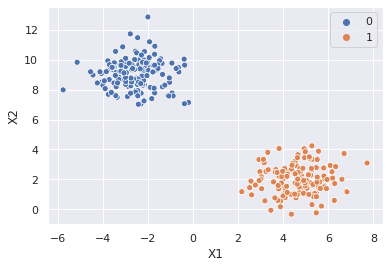

In [9]:
sns.scatterplot(features['X1'], features['X2'] ,hue=y)

In [0]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

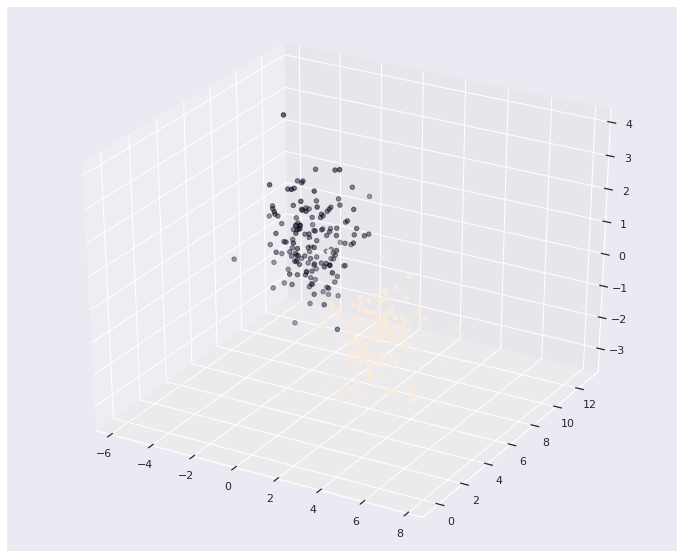

In [11]:
#@title Default title text
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features['X1'], features['X2'], features['X3'], c=y)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [0]:
encoder = Sequential()
encoder.add(Dense(2, activation='relu', input_shape=[3]))

In [0]:
decoder = Sequential()
decoder.add(Dense(3, activation='relu', input_shape=[2]))

In [0]:
autoencoder = Sequential([encoder, decoder])

In [0]:
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=1.5))

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc = MinMaxScaler()

In [0]:
scaled_data = sc.fit_transform(features)

In [24]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 1s 2ms/sample - loss: 0.2188
Epoch 2/5
300/300 [==============================] - 0s 63us/sample - loss: 0.2102
Epoch 3/5
300/300 [==============================] - 0s 78us/sample - loss: 0.2090
Epoch 4/5
300/300 [==============================] - 0s 76us/sample - loss: 0.2081
Epoch 5/5
300/300 [==============================] - 0s 55us/sample - loss: 0.2078


In [0]:
encoded_2dim = encoder.predict(scaled_data)

In [0]:
encoded_2dim

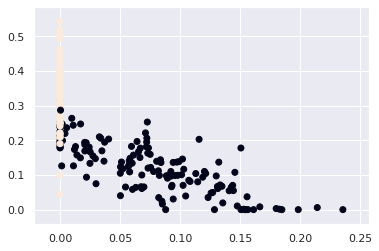

In [29]:
plt.scatter(encoded_2dim[:, 0], encoded_2dim[:,1], c=y)